# Initialize Notebook

**Scope of this notebook:** I will only proceed with importing the neccesary libraries and dataset to perform a quick EDA

In [1]:
# Import basic libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dotenv import load_dotenv
import os
import pingouin as pg


In [2]:
# Import dataset
load_dotenv()
dataset_path=os.getenv("DATASET_PATH")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,84.5123,1,25.0,0.150000,169.300000,0.610000,223.340000,36.000000,724.04000,...,227.925000,0.495000,223.250000,27.445000,665.065000,2.725000,-516.185000,2.638340,2397.0,3164.85
1,1,75.3699,1,26.0,0.097733,175.103337,0.562332,197.321714,42.533788,614.18352,...,222.355754,0.500577,218.584302,30.381415,651.981453,3.154282,2595.481588,3.146500,1662.5,2648.30
2,0,80.9068,0,29.0,0.100000,161.280000,0.540000,174.530000,35.940000,536.85000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
3,0,77.8932,0,28.0,0.110000,235.890000,0.510000,231.560000,41.660000,690.33000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
4,1,75.3534,1,24.0,0.140000,192.290000,0.550000,218.500000,35.280000,681.70000,...,269.565000,0.390000,219.405000,26.560000,608.050000,2.565000,456.550000,2.444245,1082.0,2550.50


## Data Inspection

In [3]:
# Check column names in case 
# we need to do some spelling correction
dataset.columns

Index(['Gender', 'Ageatscreening', 'Diagnosis', 'MMSE0m', 'HipsASMbaseline',
       'HipsContrastbaseline', 'HipsCorelationbaseline',
       'HipsVariancebaseline', 'HipsSumAveragebaseline',
       'HipsSumVariancebaseline', 'HipsEntropybaseline',
       'HipsClusterShadebaseline', 'ERCsASMbaseline', 'ERCsContrastbaseline',
       'ERCsCorelationbaseline', 'ERCsVariancebaseline',
       'ERCsSumAveragebaseline', 'ERCsSumVariancebaseline',
       'ERCsEntropybaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [4]:
# Check dataset overall information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      524 non-null    int64  
 1   Ageatscreening              524 non-null    float64
 2   Diagnosis                   524 non-null    int64  
 3   MMSE0m                      521 non-null    float64
 4   HipsASMbaseline             499 non-null    float64
 5   HipsContrastbaseline        511 non-null    float64
 6   HipsCorelationbaseline      505 non-null    float64
 7   HipsVariancebaseline        519 non-null    float64
 8   HipsSumAveragebaseline      523 non-null    float64
 9   HipsSumVariancebaseline     518 non-null    float64
 10  HipsEntropybaseline         503 non-null    float64
 11  HipsClusterShadebaseline    507 non-null    float64
 12  ERCsASMbaseline             521 non-null    float64
 13  ERCsContrastbaseline        507 non

In [5]:
# Check for nulls
dataset.isna().sum()

Gender                         0
Ageatscreening                 0
Diagnosis                      0
MMSE0m                         3
HipsASMbaseline               25
HipsContrastbaseline          13
HipsCorelationbaseline        19
HipsVariancebaseline           5
HipsSumAveragebaseline         1
HipsSumVariancebaseline        6
HipsEntropybaseline           21
HipsClusterShadebaseline      17
ERCsASMbaseline                3
ERCsContrastbaseline          17
ERCsCorelationbaseline        25
ERCsVariancebaseline          12
ERCsSumAveragebaseline        11
ERCsSumVariancebaseline       10
ERCsEntropybaseline            9
ERCsClusterShadebaseline      21
ERCs_thicknessbaseline        34
ERCsVolumebaseline            11
HipposcampusVolumebaseline    16
dtype: int64

In [ ]:
# Show percentage of missing values per column
missing_percentage = dataset.isna().sum() / len(dataset) * 100

# Display it nicely
print(missing_percentage)

Gender                        0.000000
Ageatscreening                0.000000
Diagnosis                     0.000000
MMSE0m                        0.572519
HipsASMbaseline               4.770992
HipsContrastbaseline          2.480916
HipsCorelationbaseline        3.625954
HipsVariancebaseline          0.954198
HipsSumAveragebaseline        0.190840
HipsSumVariancebaseline       1.145038
HipsEntropybaseline           4.007634
HipsClusterShadebaseline      3.244275
ERCsASMbaseline               0.572519
ERCsContrastbaseline          3.244275
ERCsCorelationbaseline        4.770992
ERCsVariancebaseline          2.290076
ERCsSumAveragebaseline        2.099237
ERCsSumVariancebaseline       1.908397
ERCsEntropybaseline           1.717557
ERCsClusterShadebaseline      4.007634
ERCs_thicknessbaseline        6.488550
ERCsVolumebaseline            2.099237
HipposcampusVolumebaseline    3.053435
dtype: float64


<Axes: >

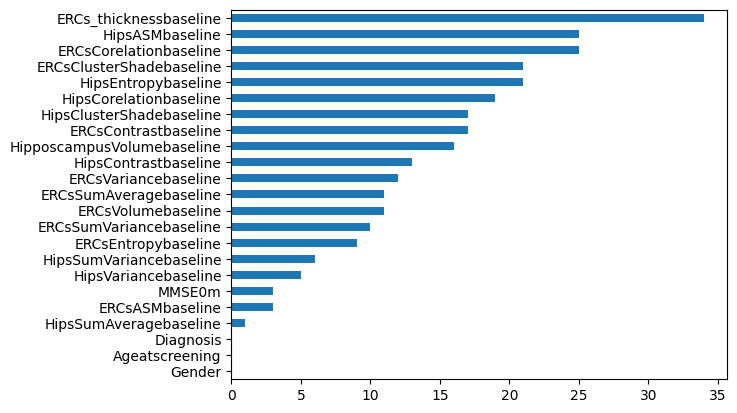

In [7]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

In [8]:
dataset.isna().mean().sum() * 100

np.float64(53.24427480916031)

In [9]:
# Check for duplicated instances
dataset.duplicated().sum()

np.int64(0)

In [10]:
# Quick descriptive overview
dataset.describe(include = "all")

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
count,524.000000,524.000000,524.000000,521.000000,499.000000,511.000000,505.000000,519.000000,523.000000,518.000000,...,507.000000,499.000000,512.000000,513.000000,514.000000,515.000000,503.000000,490.000000,513.000000,508.000000
mean,0.459924,75.590194,0.877863,26.907869,0.113878,178.802837,0.538374,199.190475,39.007985,617.089840,...,225.570867,0.490543,222.075347,30.230337,660.873874,2.938273,1761.889290,2.795994,1721.163743,3268.811516
std,0.498868,6.587342,0.777533,2.855352,0.040760,20.759684,0.050096,25.529932,5.150675,89.529218,...,23.862749,0.046911,9.888942,3.251724,38.003132,0.211884,3146.275713,0.320574,394.356271,510.725391
min,0.000000,55.205500,0.000000,16.000000,0.046514,122.020000,0.405029,129.360000,25.644778,378.250000,...,163.005000,0.362826,195.943876,22.254622,554.631319,2.370000,-3992.340000,1.931125,830.000000,1810.850000
25%,0.000000,71.573325,0.000000,25.000000,0.080000,164.455000,0.508588,179.665000,35.890000,551.580000,...,209.277500,0.460000,215.805000,27.975000,635.912658,2.802773,-695.110000,2.609108,1434.000000,2911.612500
50%,0.000000,75.769900,1.000000,28.000000,0.110000,178.760000,0.550000,205.150000,39.010000,644.462289,...,223.970000,0.495000,222.507500,30.080312,665.755440,2.930000,1209.400000,2.804470,1739.000000,3265.025000
75%,1.000000,80.163050,1.000000,29.000000,0.140000,193.050000,0.576250,219.895780,42.743978,688.117223,...,241.007152,0.525000,229.388750,32.390000,690.136475,3.085000,4140.610799,2.991710,2019.000000,3641.537500
max,1.000000,90.989000,2.000000,30.000000,0.230000,235.890000,0.680000,247.015556,51.890000,775.092086,...,290.395000,0.600000,246.528722,38.930000,755.270000,3.500000,10334.285000,3.598500,2658.500000,4605.050000


## Target analysis

Lets have a quick look at the target

In [11]:
dataset["Diagnosis"].value_counts().sort_index()

Diagnosis
0    194
1    200
2    130
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

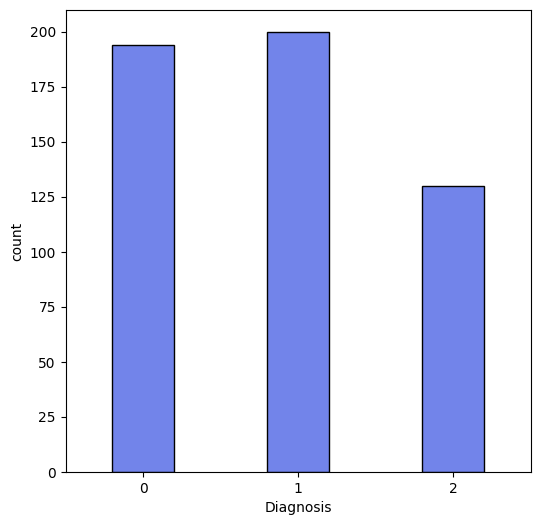

In [12]:
# Plot the target using a bar plot
plt.figure(figsize = (6,6))

sns.countplot(data = dataset, 
              x = dataset["Diagnosis"].sort_index(),
              color = "#5e76fe",
              width = 0.4,
              edgecolor = "black",
)

### Group one seperation

In [13]:
group_one = dataset[dataset["Diagnosis"] == 0]
group_two = dataset[dataset["Diagnosis"] == 3]

combined_group_one = pd.concat([group_one, group_two], ignore_index = True)
combined_group_one["Diagnosis"].unique()

array([0])

In [14]:
combined_group_one

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,80.9068,0,29.0,0.100000,161.28,0.540000,174.530000,35.940000,536.850000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
1,0,77.8932,0,28.0,0.110000,235.89,0.510000,231.560000,41.660000,690.330000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
2,1,74.6274,0,29.0,0.171489,NaN,0.492663,237.593731,35.325773,711.631342,...,238.743582,0.492663,237.593731,35.325773,711.631342,3.113417,5788.690804,NaN,1800.0,2763.75
3,1,81.1863,0,30.0,0.090000,189.21,0.490000,196.080000,43.170000,595.120000,...,225.445000,0.460000,212.210000,34.825000,623.405000,3.280000,6979.330000,2.838685,1984.5,3037.95
4,0,70.0247,0,30.0,0.050000,144.09,0.460000,147.390000,48.240000,445.450000,...,212.360000,0.475000,211.995000,36.590000,635.615000,3.180000,NaN,NaN,2300.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,75.6932,0,30.0,0.060000,145.40,0.500000,148.600000,40.250000,448.990000,...,202.440000,0.485000,196.980000,33.995000,585.480000,NaN,5982.985000,2.782180,2658.5,4145.35
190,0,84.8411,0,30.0,0.130000,189.62,0.580000,228.120000,38.760000,722.870000,...,232.380000,0.510000,229.790000,29.540000,686.765000,2.985000,-1093.380000,2.867565,2024.0,3825.35
191,0,76.3534,0,30.0,0.120000,168.68,0.590000,210.980000,37.650000,675.240000,...,163.005000,0.585000,197.740000,24.485000,627.950000,2.540000,-849.180000,3.121615,2067.0,3705.35
192,0,79.7726,0,30.0,0.146430,NaN,0.468203,230.344615,36.230230,682.343343,...,239.035117,0.468203,230.344615,36.230230,682.343343,3.296802,6871.857379,3.185500,1968.5,3821.30


In [15]:
y_split_one = combined_group_one["Diagnosis"]
y_split_one.value_counts()

Diagnosis
0    194
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

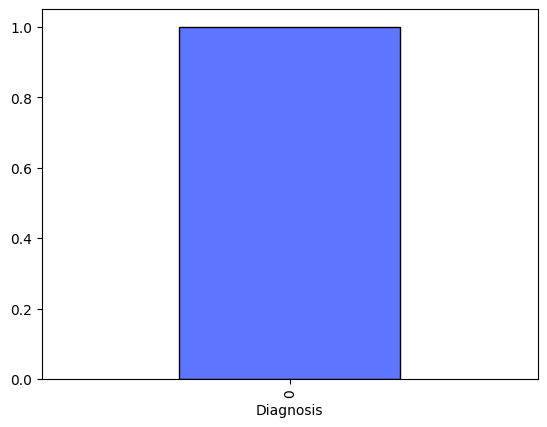

In [16]:
y_split_one.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

### Group two seperation

In [17]:
# Group two
group_three = dataset[dataset["Diagnosis"] == 0]
group_four = dataset[dataset["Diagnosis"] == 2]

combined_groups_two = pd.concat([group_three, group_four], ignore_index = True)
combined_groups_two["Diagnosis"].unique()

array([0, 2])

In [18]:
combined_groups_two

,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,HipsSumVariancebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,0,80.9068,0,29.0,0.100000,161.28,0.540000,174.530000,35.940000,536.850000,...,221.760000,0.445000,NaN,30.565000,NaN,3.120000,4287.780000,2.897730,2188.0,3602.50
1,0,77.8932,0,28.0,0.110000,235.89,0.510000,231.560000,41.660000,690.330000,...,217.450000,0.540000,236.750000,30.465000,729.545000,3.010000,-741.895000,2.734850,2292.5,3267.45
2,1,74.6274,0,29.0,0.171489,NaN,0.492663,237.593731,35.325773,711.631342,...,238.743582,0.492663,237.593731,35.325773,711.631342,3.113417,5788.690804,NaN,1800.0,2763.75
3,1,81.1863,0,30.0,0.090000,189.21,0.490000,196.080000,43.170000,595.120000,...,225.445000,0.460000,212.210000,34.825000,623.405000,3.280000,6979.330000,2.838685,1984.5,3037.95
4,0,70.0247,0,30.0,0.050000,144.09,0.460000,147.390000,48.240000,445.450000,...,212.360000,0.475000,211.995000,36.590000,635.615000,3.180000,NaN,NaN,2300.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,63.9260,2,23.0,0.060000,146.65,NaN,NaN,44.680000,NaN,...,252.615000,0.400000,NaN,NaN,596.395000,NaN,NaN,2.911895,1820.0,3942.30
320,0,64.3123,2,21.0,0.160000,191.78,0.590000,234.500000,36.050000,746.200000,...,203.480000,0.525000,212.765000,25.460000,647.570000,2.695000,-955.770000,2.536830,1727.0,3667.95
321,0,84.4055,2,21.0,0.160000,178.17,0.530000,194.590000,32.520000,600.190000,...,229.405000,0.470000,216.275000,27.855000,635.700000,2.855000,-995.715000,2.480225,1277.0,2953.25
322,1,89.1699,2,27.0,0.150000,189.55,0.600000,235.680000,35.620000,753.160000,...,219.185000,0.525000,233.400000,31.820000,714.415000,3.075000,2150.350000,2.983895,2435.5,3210.80


In [19]:
combined_groups_two["Diagnosis"].value_counts()

y_split_two = combined_groups_two["Diagnosis"]
y_split_two.value_counts()

Diagnosis
0    194
2    130
Name: count, dtype: int64

<Axes: xlabel='Diagnosis'>

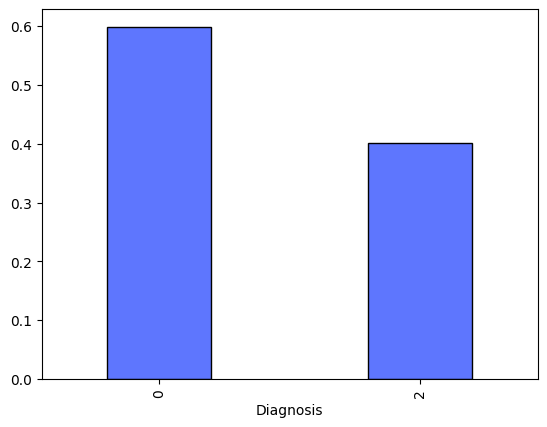

In [20]:
y_split_two.value_counts(normalize=True).plot(kind="bar",
                                                color = "#5e76fe",
                                                width = 0.4,
                                                edgecolor = "black",)

*We can see at first glance that we have an imbalance dataset.*

**Lets have a closer look on whether our variables in the dataset do follow a normal distribution and its Skewness level.**

* We use the Shapiro-Wilk test to assess whether the data in each column follows a normal distribution. p-value: The probability that the data comes from a normal distribution. A p-value greater than 0.05 suggests the data is normal, while less than 0.05 suggests it is not normal.

* If skewness is 0, the data is perfectly symmetric. Negative skewness means the left tail is longer (data is skewed left), and positive skewness means the right tail is longer (data is skewed right).

* A kurtosis of 3 indicates a normal distribution. If kurtosis is greater than 3, it indicates heavier tails (leptokurtic), and if it's less than 3, it indicates lighter tails (platykurtic).

*In this case, scipy wouldnt allow me to work with null values, therefore, I had to drop them initially. This will be taken into consideration when performing data imputation and re-assess the dataset for completeness.*

In [21]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in dataset.columns:  
    stat, p = shapiro(dataset[column].dropna())
    skewness = skew(dataset[column].dropna())
    kurt = kurtosis(dataset[column].dropna())
    results[column] = {'Statistic': stat, 'p-value': p, 'Skewness': skewness, 'Kurtosis': kurt, 'Normal': p > 0.05} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,Statistic,p-value,Skewness,Kurtosis,Normal
Gender,0.634207,0.0,0.160823,-1.974136,False
Ageatscreening,0.985618,0.000048,-0.371197,0.05735,False
Diagnosis,0.798342,0.0,0.21501,-1.31548,False
MMSE0m,0.889583,0.0,-0.915655,0.098028,False
HipsASMbaseline,0.964464,0.0,0.540068,-0.179772,False
HipsContrastbaseline,0.995796,0.189188,0.121467,-0.299684,True
HipsCorelationbaseline,0.972798,0.0,-0.496593,-0.208734,False
HipsVariancebaseline,0.943578,0.0,-0.66027,-0.430889,False
HipsSumAveragebaseline,0.988535,0.000406,-0.174591,-0.442293,False
HipsSumVariancebaseline,0.939227,0.0,-0.709842,-0.357234,False


It appears that HipsContrastbaseline and ERCsEntropybaseline do indicate a normal distribution 

How about we visuallize them for clarity? Lets use histograms

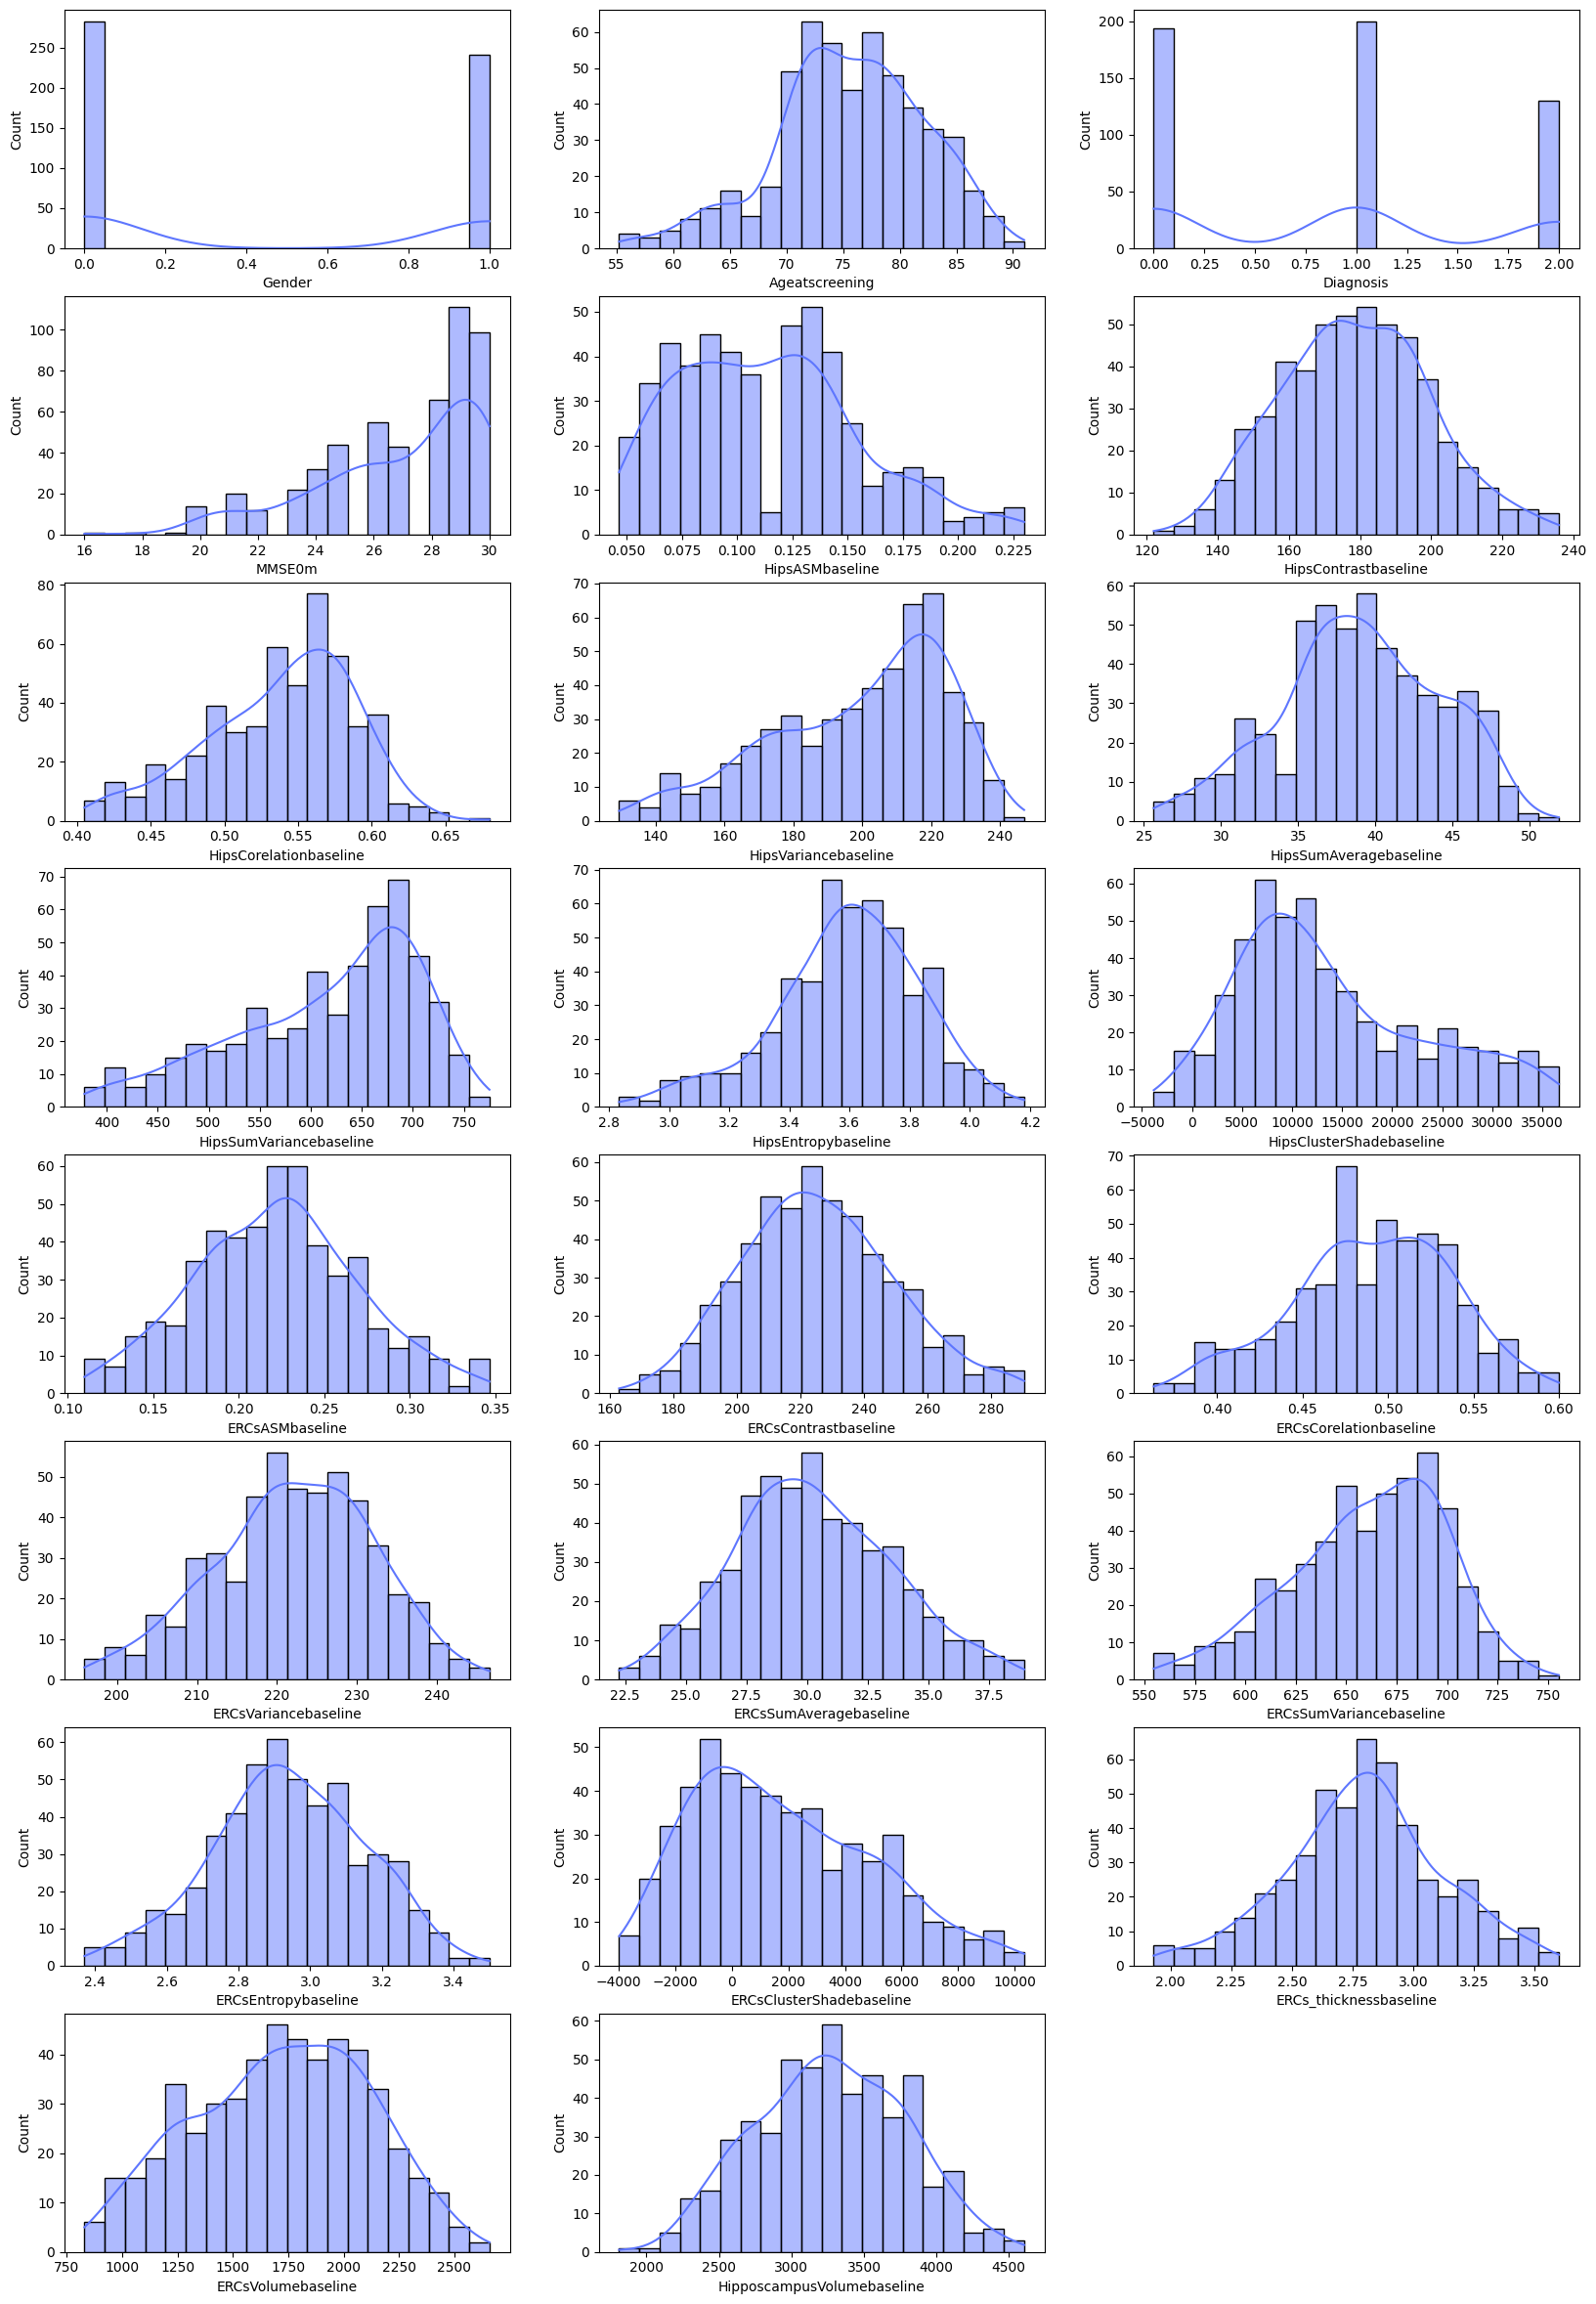

In [22]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(12,3,i+1)
    sns.histplot(dataset[dataset.columns[i]], 
                 color="#5e76fe", 
                 kde = True,
                 edgecolor = "black",
                 bins=20)

Now we want to check for any outliers. How about we use boxplots?

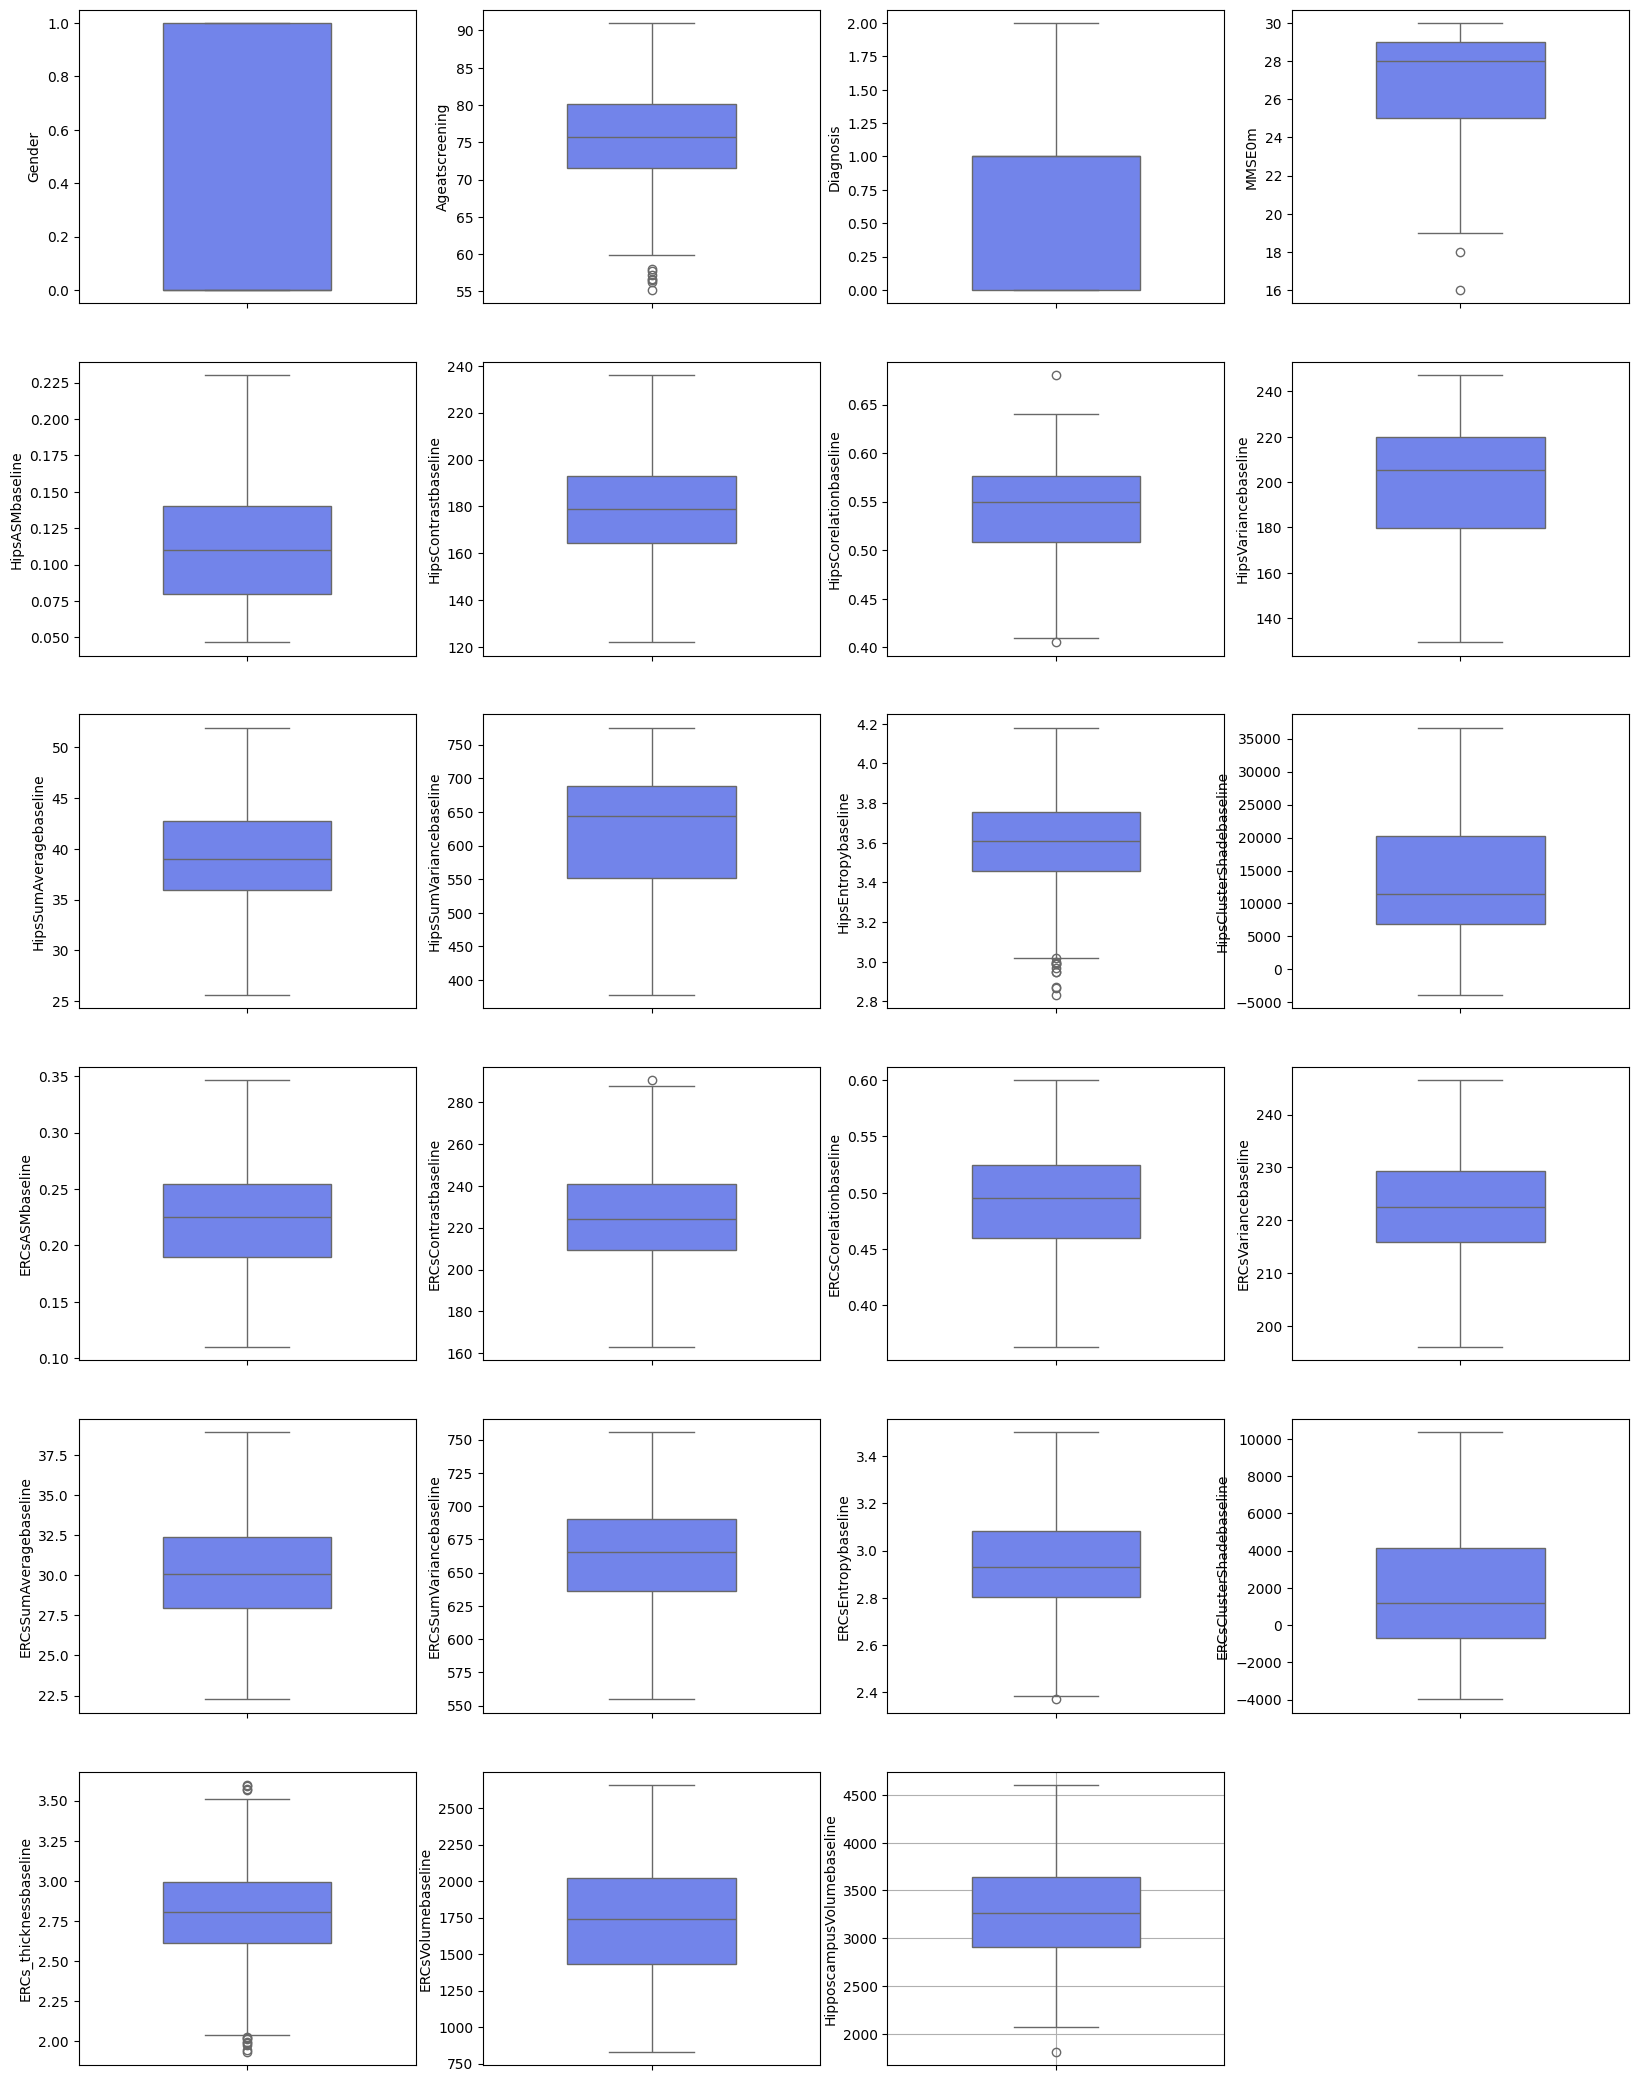

In [23]:
# Plot each column using boxplot
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10,4,i+1)
    sns.boxplot(dataset[dataset.columns[i]], 
                color="#5e76fe",
                width=.5)
plt.grid()

We can now better understand the spread of our dataset and detect a few outliers from here. 

How about we check the Q-Q plot for each variable? Perhaps we can have a much better comprehension if the data follows a normal distribution aside from relying on the above histogram.

Note: *Q-Q plots rely on the complete dataset to compute quantiles. Therefore, i had to drop a few values to see the red line*

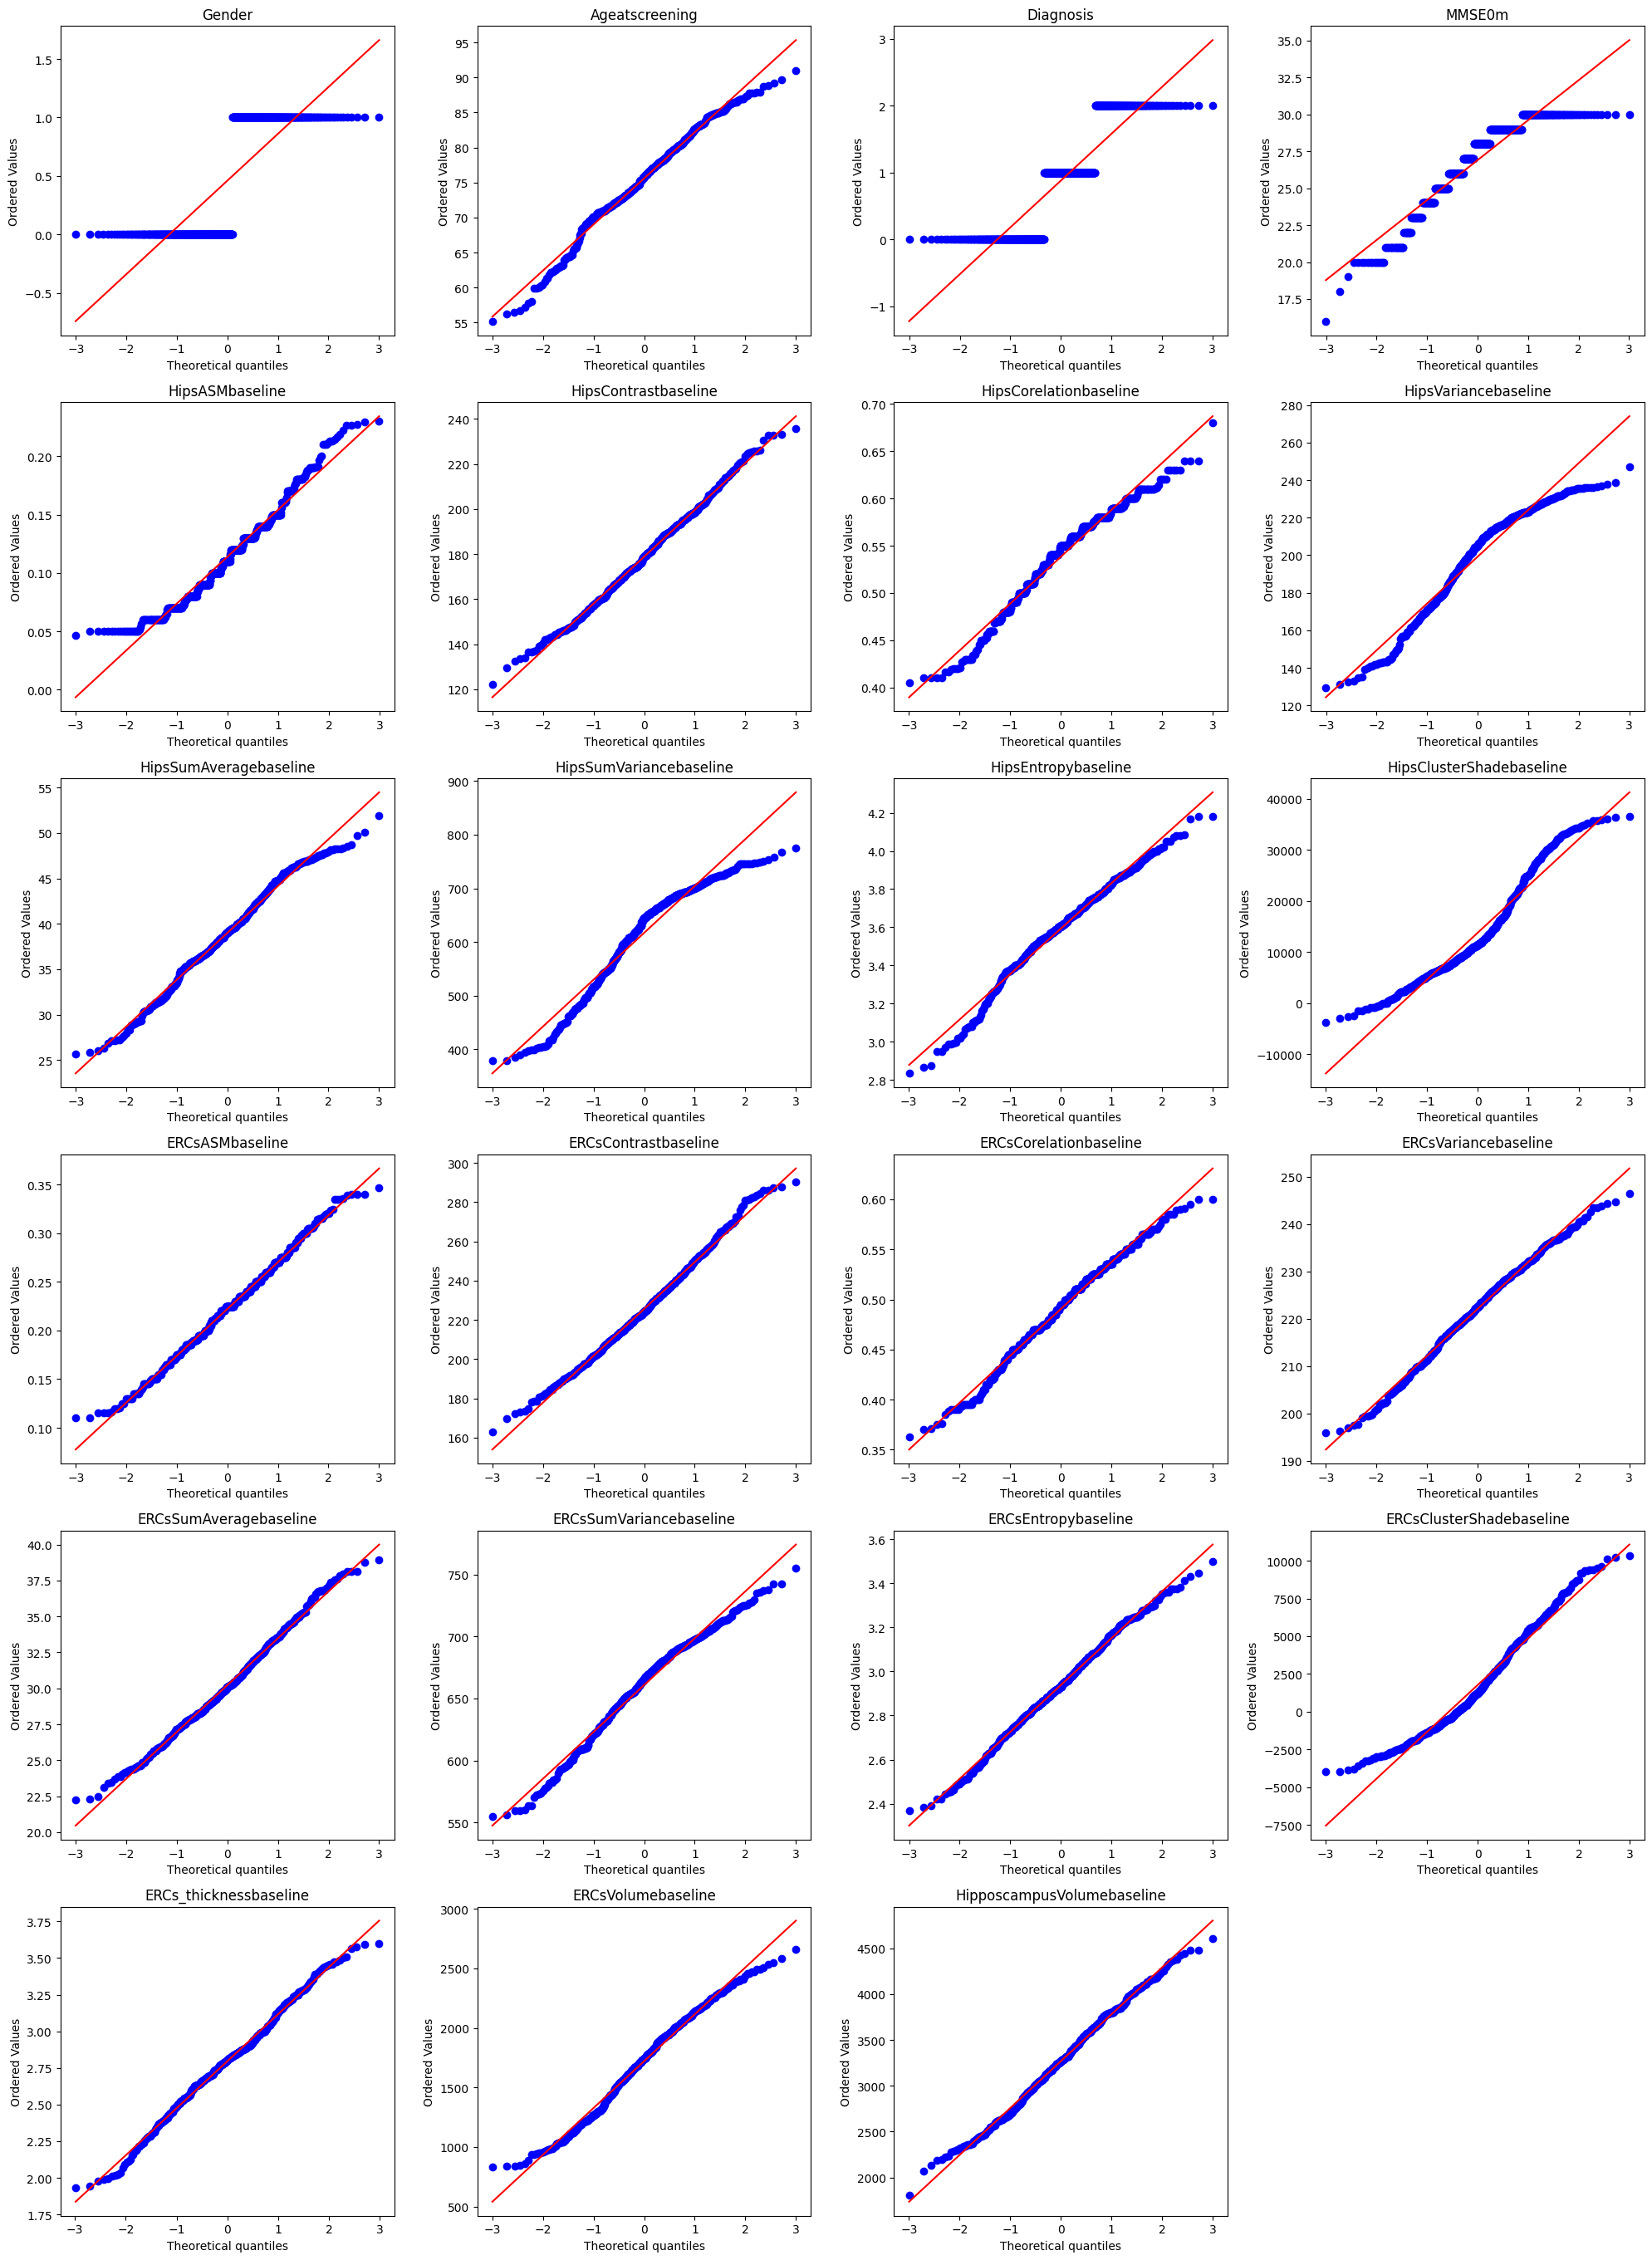

In [24]:
# Plot Q-Q plots for each column
plt.figure(figsize=(20, 45))

for i in range(len(dataset.columns)):
    plt.subplot(10, 4, i + 1)
    stats.probplot(dataset[dataset.columns[i]].dropna(), 
                   dist='norm', plot=plt)
    plt.title(dataset.columns[i])

plt.tight_layout()

 Interesing, perhaps the distribution may change if we perform data imputation? If thats the case, then we may need to perform data transformation.

In [25]:
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis

results = {}

for column in dataset.columns:  
    stat, p = shapiro(dataset[column].dropna())
    skewness = skew(dataset[column].dropna())
    kurt = kurtosis(dataset[column].dropna())
    results[column] = {'p-value': p, 'Normal': p > 0.05, 'Skewness': skewness, 'Kurtosis': kurt} 

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df

,p-value,Normal,Skewness,Kurtosis
Gender,0.0,False,0.160823,-1.974136
Ageatscreening,0.000048,False,-0.371197,0.05735
Diagnosis,0.0,False,0.21501,-1.31548
MMSE0m,0.0,False,-0.915655,0.098028
HipsASMbaseline,0.0,False,0.540068,-0.179772
HipsContrastbaseline,0.189188,True,0.121467,-0.299684
HipsCorelationbaseline,0.0,False,-0.496593,-0.208734
HipsVariancebaseline,0.0,False,-0.66027,-0.430889
HipsSumAveragebaseline,0.000406,False,-0.174591,-0.442293
HipsSumVariancebaseline,0.0,False,-0.709842,-0.357234
